In [1]:
import platform
import os

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.core.nanops import bottleneck_switch

from Detector_Classes.M3RefTracking import M3RefTracking
from Detector_Classes.DetectorConfigLoader import DetectorConfigLoader
from Detector_Classes.DreamDetector import DreamDetector

from det_classes_test import plot_ray_hits_2d, align_dream, get_residuals, get_efficiency, get_residuals_subdets_with_err, get_rays_in_sub_det_vectorized, get_rays_in_sub_det, get_raw_residuals, get_circle_scan, plot_2D_circle_scan

In [2]:
# Check if platform is Windows or Linux
if platform.system() == 'Windows':
    base_dir = 'F:/Saclay/cosmic_data/'
    det_type_info_dir = 'C:/Users/Dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = 'F:/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dylan-MS-7C84':
    base_dir = '/media/ucla/Saclay/cosmic_data/'
    det_type_info_dir = '/home/dylan/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/media/ucla/Saclay/Analysis/Cosmic Bench/11-5-24/'
    chunk_size = 100  # Number of files to process at once
elif platform.system() == 'Linux' and platform.node() == 'dphnpct50.extra.cea.fr':
    base_dir = '/local/home/dn277127/Bureau/cosmic_data/'
    det_type_info_dir = '/local/home/dn277127/PycharmProjects/Cosmic_Bench_DAQ_Control/config/detectors/'
    out_dir = '/local/home/dn277127/Bureau/cosmic_data/Analysis/11-15-24/'
    chunk_size = 5  # Number of files to process at once
else:
    raise OSError('Unknown platform')

run_name = 'urw_stats_10-31-24'
run_dir = f'{base_dir}{run_name}/'
sub_run_name = 'long_run'

det_single = 'urw_inter'

# file_nums = list(range(0, 49))
file_nums = list(range(0, 109))
# file_nums = 'all'

noise_sigma = 5

realign_dream = True  # If False, read alignment from file, if True, realign Dream detector

run_json_path = f'{run_dir}run_config.json'
data_dir = f'{run_dir}{sub_run_name}/filtered_root/'
ped_dir = f'{run_dir}{sub_run_name}/decoded_root/'
m3_dir = f'{run_dir}{sub_run_name}/m3_tracking_root/'
alignment_dir = f'{run_dir}alignments/'

z_align_range = [5, 5]  # mm range to search for optimal z position

try:
    os.mkdir(alignment_dir)
except FileExistsError:
    pass
try:
    os.mkdir(out_dir)
except FileExistsError:
    pass

In [3]:
print(f'Getting ray data...')
ray_data = M3RefTracking(m3_dir, single_track=True, file_nums=file_nums)

Getting ray data...


100%|██████████| 237/237 [00:14<00:00, 16.19it/s]


In [4]:
det_config_loader = DetectorConfigLoader(run_json_path, det_type_info_dir)

In [5]:
det_config = det_config_loader.get_det_config(det_single, sub_run_name=sub_run_name)
det = DreamDetector(config=det_config)
print(f'FEU Num: {det.feu_num}')
print(f'FEU Channels: {det.feu_connectors}')
print(f'HV: {det.hv}')
det.load_dream_data(data_dir, ped_dir, noise_sigma, file_nums, chunk_size, save_waveforms=False, waveform_fit_func='parabola_vectorized')
print(f'Hits shape: {det.dream_data.hits.shape}')

FEU Num: 6
FEU Channels: [1, 2, 3, 4]
HV: {'drift': 600, 'resist_1': 410}
Reading in data...


100%|██████████| 5/5 [00:02<00:00,  1.80it/s]


Read in data shape: (11033, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 20.98it/s]


Fitting time: 0.36415719985961914 s
Processed sub-chunk 1/1
Processed chunk 1/48


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Read in data shape: (11039, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 21.64it/s]


Fitting time: 0.4051213264465332 s
Processed sub-chunk 1/1
Processed chunk 2/48


100%|██████████| 5/5 [00:03<00:00,  1.33it/s]


Read in data shape: (10750, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 22.39it/s]


Fitting time: 0.43846869468688965 s
Processed sub-chunk 1/1
Processed chunk 3/48


100%|██████████| 5/5 [00:04<00:00,  1.22it/s]


Read in data shape: (10941, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 21.39it/s]


Fitting time: 0.4986722469329834 s
Processed sub-chunk 1/1
Processed chunk 4/48


100%|██████████| 5/5 [00:04<00:00,  1.01it/s]


Read in data shape: (10862, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 22.68it/s]


Fitting time: 0.5363702774047852 s
Processed sub-chunk 1/1
Processed chunk 5/48


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


Read in data shape: (11145, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 22.21it/s]


Fitting time: 0.564054012298584 s
Processed sub-chunk 1/1
Processed chunk 6/48


100%|██████████| 5/5 [00:05<00:00,  1.02s/it]


Read in data shape: (11055, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 14.57it/s]


Fitting time: 0.7701940536499023 s
Processed sub-chunk 1/1
Processed chunk 7/48


100%|██████████| 5/5 [00:05<00:00,  1.09s/it]


Read in data shape: (10925, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 13.78it/s]


Fitting time: 0.8541688919067383 s
Processed sub-chunk 1/1
Processed chunk 8/48


100%|██████████| 5/5 [00:05<00:00,  1.13s/it]


Read in data shape: (10973, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 17.71it/s]


Fitting time: 0.7479872703552246 s
Processed sub-chunk 1/1
Processed chunk 9/48


100%|██████████| 5/5 [00:05<00:00,  1.18s/it]


Read in data shape: (10783, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 11.02it/s]


Fitting time: 1.0404753684997559 s
Processed sub-chunk 1/1
Processed chunk 10/48


100%|██████████| 5/5 [00:06<00:00,  1.22s/it]


Read in data shape: (10957, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 13.02it/s]


Fitting time: 0.9534306526184082 s
Processed sub-chunk 1/1
Processed chunk 11/48


100%|██████████| 5/5 [00:08<00:00,  1.73s/it]


Read in data shape: (11200, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 10.74it/s]


Fitting time: 1.1275303363800049 s
Processed sub-chunk 1/1
Processed chunk 12/48


100%|██████████| 5/5 [00:06<00:00,  1.26s/it]


Read in data shape: (11128, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00,  9.31it/s]


Fitting time: 1.386765480041504 s
Processed sub-chunk 1/1
Processed chunk 13/48


100%|██████████| 5/5 [00:02<00:00,  1.93it/s]


Read in data shape: (10735, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 19.94it/s]


Fitting time: 0.9534108638763428 s
Processed sub-chunk 1/1
Processed chunk 14/48


100%|██████████| 5/5 [00:03<00:00,  1.46it/s]


Read in data shape: (10951, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 22.48it/s]


Fitting time: 0.8649744987487793 s
Processed sub-chunk 1/1
Processed chunk 15/48


100%|██████████| 5/5 [00:03<00:00,  1.26it/s]


Read in data shape: (11013, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 20.61it/s]


Fitting time: 0.9156990051269531 s
Processed sub-chunk 1/1
Processed chunk 16/48


100%|██████████| 5/5 [00:04<00:00,  1.11it/s]


Read in data shape: (11239, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 20.64it/s]


Fitting time: 0.9729630947113037 s
Processed sub-chunk 1/1
Processed chunk 17/48


100%|██████████| 5/5 [00:05<00:00,  1.07s/it]


Read in data shape: (10911, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 18.62it/s]


Fitting time: 1.0399515628814697 s
Processed sub-chunk 1/1
Processed chunk 18/48


100%|██████████| 5/5 [00:05<00:00,  1.05s/it]


Read in data shape: (10950, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 17.02it/s]


Fitting time: 1.1598577499389648 s
Processed sub-chunk 1/1
Processed chunk 19/48


100%|██████████| 5/5 [00:05<00:00,  1.14s/it]


Read in data shape: (10926, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 12.38it/s]


Fitting time: 1.4351153373718262 s
Processed sub-chunk 1/1
Processed chunk 20/48


100%|██████████| 5/5 [00:06<00:00,  1.27s/it]


Read in data shape: (11249, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 11.57it/s]


Fitting time: 1.8381035327911377 s
Processed sub-chunk 1/1
Processed chunk 21/48


100%|██████████| 5/5 [00:06<00:00,  1.36s/it]


Read in data shape: (10999, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 12.91it/s]


Fitting time: 1.6795763969421387 s
Processed sub-chunk 1/1
Processed chunk 22/48


100%|██████████| 5/5 [00:05<00:00,  1.10s/it]


Read in data shape: (10967, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 11.83it/s]


Fitting time: 1.8530330657958984 s
Processed sub-chunk 1/1
Processed chunk 23/48


100%|██████████| 5/5 [00:06<00:00,  1.28s/it]


Read in data shape: (10771, 256, 32)
Getting amplitudes...


100%|██████████| 7/7 [00:00<00:00, 13.56it/s]


Fitting time: 2.061753273010254 s
Processed sub-chunk 1/1
Processed chunk 24/48


  0%|          | 0/5 [00:03<?, ?it/s]

KeyboardInterrupt



In [ ]:
det.dream_data.plot_pedestals()

In [ ]:
det.dream_data.plot_noise_metric()

In [ ]:
det.dream_data.plot_hits_vs_strip(print_dead_strips=True)

In [ ]:
det.dream_data.plot_amplitudes_vs_strip()

In [ ]:
det.make_sub_detectors()
event_nums = det.plot_xy_amp_sum_vs_event_num(True, 500, False, 15)

if realign_dream:
    det.add_rotation(90, 'z')

In [ ]:
plot_ray_hits_2d(det, ray_data)

In [ ]:
det.plot_hits_1d()

In [ ]:
print(len(det.dream_data.hits))

In [ ]:
# for event_num in range(min(len(det.dream_data.hits), 2)):
#     det.plot_event_1d(event_num)
#     det.plot_event_2d(event_num)
#     det.dream_data.plot_waveforms(event_num)

In [ ]:
z_orig = det.center[2]
x_bnds = det.center[0] - det.size[0] / 2, det.center[0] + det.size[0] / 2
y_bnds = det.center[1] - det.size[1] / 2, det.center[1] + det.size[1] / 2
ray_traversing_triggers = ray_data.get_traversing_triggers(z_orig, x_bnds, y_bnds, expansion_factor=0.1)

alignment_file = f'{alignment_dir}{det.name}_alignment.txt'
if realign_dream:
    align_dream(det, ray_data, z_align_range)
    det.write_det_alignment_to_file(alignment_file)
else:
    det.read_det_alignment_from_file(alignment_file)

In [ ]:
plot_ray_hits_2d(det, ray_data)

In [ ]:
get_efficiency(det, ray_data, plot=True, in_det=True, tolerance=0.2, grid_size=2)

In [ ]:
get_residuals(det, ray_data, plot=True, in_det=True, tolerance=0.2)

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2)

In [ ]:
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

New stuff above

In [ ]:
sub_resids = get_residuals_subdets_with_err(det, ray_data, in_det=True, tolerance=0.2, max_r=2)
sub_resids = pd.DataFrame(sub_resids)
print(sub_resids)
fig, ax = plt.subplots()
ax.errorbar(sub_resids['interpitch_x'], sub_resids['x_std'] * 1e3, yerr=sub_resids['x_std_err'] * 1e3, fmt='o', capsize=5, label='X')
ax.errorbar(sub_resids['interpitch_x'], sub_resids['y_std'] * 1e3, yerr=sub_resids['y_std_err'] * 1e3, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Resolution (μm)')
fig.tight_layout()

In [ ]:
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
pitches, x_means, x_errs, y_means, y_errs = [], [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=-2)
    print(f'Rays in sub-detector {sub_det.sub_index}: {len(x_rays_in)}, total rays: {len(x_rays)}')
    x_mean, y_mean, x_err, y_err = sub_det.plot_cluster_sizes(event_nums=event_num_rays_in)
    pitches.append(sub_det.x_interpitch)
    x_means.append(x_mean)
    x_errs.append(x_err)
    y_means.append(y_mean)
    y_errs.append(y_err)

In [ ]:
fig, ax = plt.subplots()
ax.errorbar(pitches, x_means, yerr=x_errs, fmt='o', capsize=5, label='X')
ax.errorbar(pitches, y_means, yerr=y_errs, fmt='o', capsize=5, label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots()
ax.plot(pitches, x_means, 'o', label='X')
ax.plot(pitches, y_means, 'o', label='Y')
ax.legend()
ax.set_xlabel('X Strip Interpitch (mm)')
ax.set_ylabel('Cluster Size (N strips)')
fig.tight_layout()

In [ ]:
x_res, y_res, x_rays, y_rays = get_raw_residuals(det, ray_data, in_det=True, tolerance=0.0)

In [ ]:
scan_xs = np.linspace(-70, 60, 100 + 1)
scan_ys = np.linspace(-70, 60, 100 + 1)

# Generate mesh grid
x_mesh, y_mesh = np.meshgrid(scan_xs, scan_ys)
xy_pairs = list(zip(x_mesh.ravel(), y_mesh.ravel()))  # Flatten to list of (x, y) pairs
scan_radius = 2
min_events = 50
res_range = [160, 810]  # μm
mean_range = [-200, 210]  # μm

scan_resolutions_x, scan_means_x, events_x = get_circle_scan(np.array(x_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_x, scan_means_x, scan_xs, scan_ys, scan_events=events_x, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='X (Top) Spatial Resolution', mean_title='X (Top) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
scan_resolutions_y, scan_means_y, events_y = get_circle_scan(np.array(y_res), np.array(x_rays), np.array(y_rays), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_resolutions_y, scan_means_y, scan_xs, scan_ys, scan_events=events_y, radius=scan_radius, percentile_filter=(1, 99), conversion_factor=1e3, unit_str='μm', res_title='Y (Bottom) Spatial Resolution', mean_title='Y (Bottom) Mean Residual', res_range=res_range, mean_range=mean_range)

In [ ]:
x_rays, y_rays, event_num_rays = ray_data.get_xy_positions(det.center[2])
x_sizes_all, y_sizes_all, x_rays_cluster_sizes, y_rays_cluster_sizes = [], [], [], []
for sub_det in det.sub_detectors:
    x_rays_in, y_rays_in, event_num_rays_in = get_rays_in_sub_det_vectorized(det, det.sub_detectors[sub_det.sub_index], x_rays, y_rays, event_num_rays, tolerance=0)
    x_sizes, y_sizes, ray_mask = sub_det.get_cluster_sizes(largest=True, event_nums=event_num_rays_in, return_ray_mask=True)
    x_sizes_all.extend(x_sizes)
    y_sizes_all.extend(y_sizes)
    x_rays_cluster_sizes.extend(x_rays_in[ray_mask])
    y_rays_cluster_sizes.extend(y_rays_in[ray_mask])
scan_resolutions_csx, scan_means_csx, events_csx = get_circle_scan(np.array(x_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, shape='square', gaus_fit=False, min_events=500, plot=False)
plot_2D_circle_scan(scan_resolutions_csx, scan_means_csx, scan_xs, scan_ys, scan_events=events_csx, radius=scan_radius, percentile_filter=(1, 95), plot='mean', unit_str='N strips', mean_title='X Cluster Size')

In [ ]:
scan_resolutions_csy, scan_means_csy, events_csy = get_circle_scan(np.array(y_sizes_all), np.array(x_rays_cluster_sizes), np.array(y_rays_cluster_sizes), xy_pairs, radius=scan_radius, percentile_cuts=(1, 99), shape='square', gaus_fit=False, plot=False)
plot_2D_circle_scan(scan_resolutions_csy, scan_means_csy, scan_xs, scan_ys, scan_events=events_csy, radius=scan_radius, percentile_filter=(1, 99), plot='mean', unit_str='N strips', mean_title='Y Cluster Size')

In [ ]:
det.dream_data.correct_for_fine_timestamps()

sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

Text(0.5, 1.0, 'Time of Max for Y (Bottom) Strips')

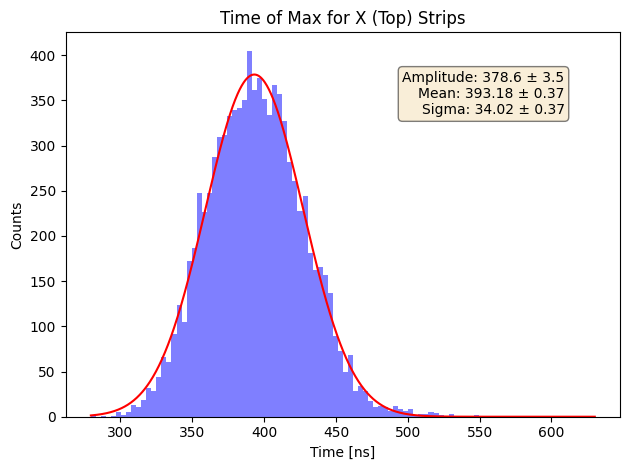

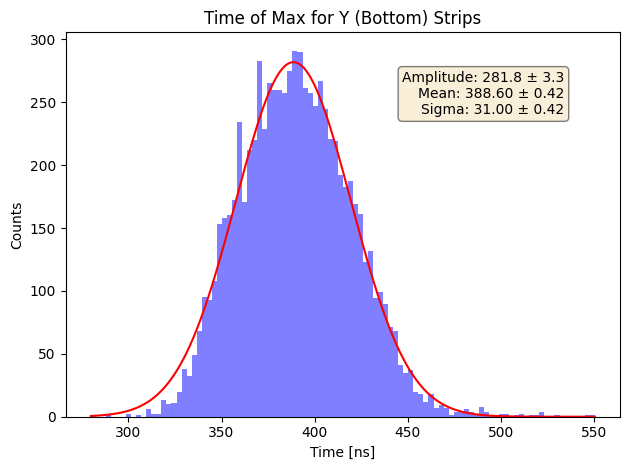

In [53]:
sigma_x, sigma_x_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=600, plot=True)
plt.title(f'Time of Max for X (Top) Strips')

sigma_y, sigma_y_err = det.dream_data.plot_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=600, plot=True)
plt.title(f'Time of Max for Y (Bottom) Strips')

In [ ]:
x_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(0, int(256 / 2)), min_amp=None, filter_times=False)
x_time_maxes, x_time_filter = det.dream_data.filter_time_maxes(x_time_maxes, return_mask=True)
y_time_maxes = det.dream_data.get_event_time_maxes(max_channel=True, channels=np.arange(int(256 / 2), 256), min_amp=None, filter_times=False)
y_time_maxes, y_time_filter = det.dream_data.filter_time_maxes(y_time_maxes, return_mask=True)
time_ray_event_mask_x = np.isin(event_num_rays, det.dream_data.event_nums[x_time_filter])
time_ray_event_mask_y = np.isin(event_num_rays, det.dream_data.event_nums[y_time_filter])
x_rays_timing_x, y_rays_timing_x = x_rays[time_ray_event_mask_x], y_rays[time_ray_event_mask_x]
x_rays_timing_y, y_rays_timing_y = x_rays[time_ray_event_mask_y], y_rays[time_ray_event_mask_y]

scan_res min: 23.992989753654037, max: 88.95765394397817
res_vmax: 45.567144922594224
mean_vmin: 390.81728233972075, mean_vmax: 404.44340471666595


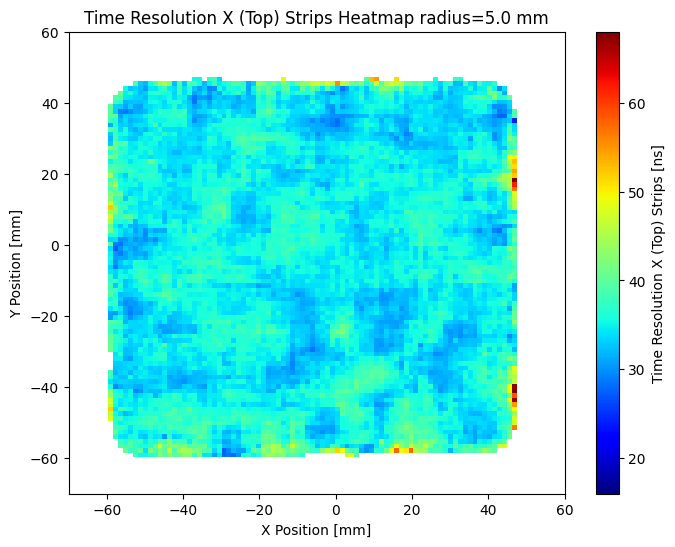

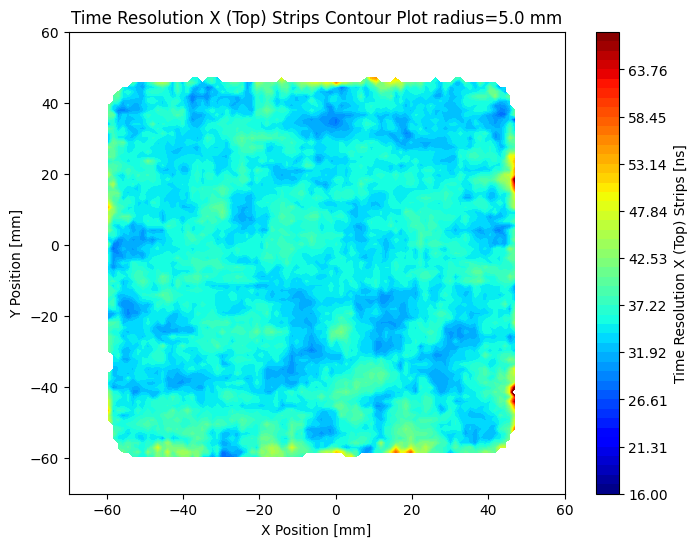

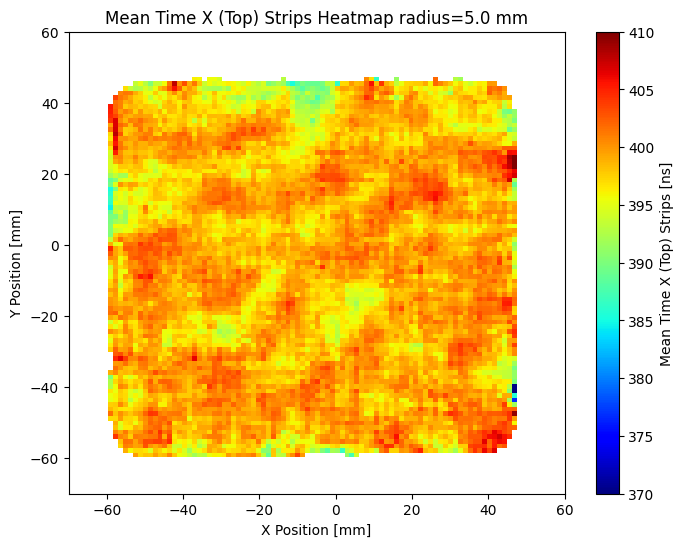

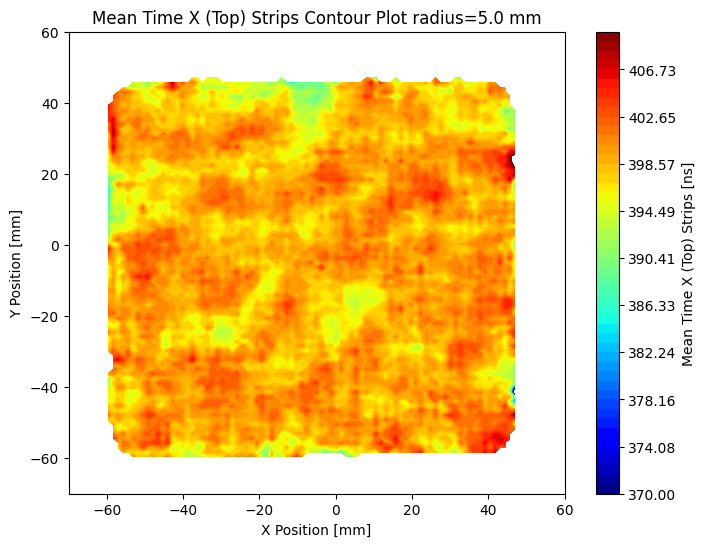

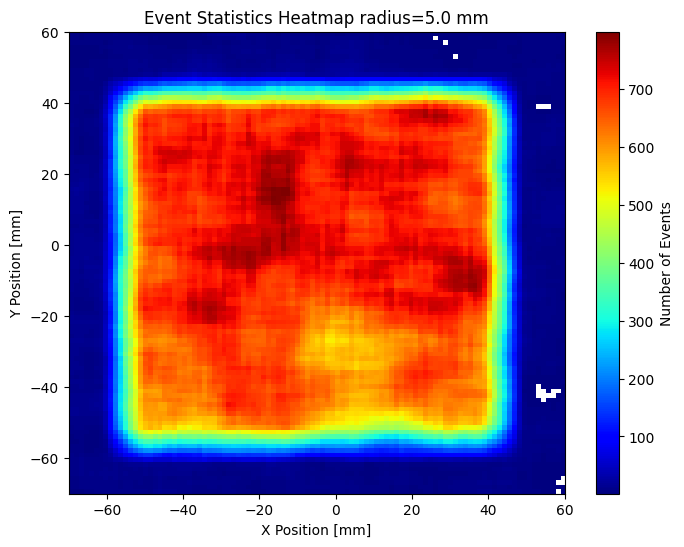

In [54]:
scan_radius = 5
min_events = 100
res_range = [16, 68]  # ns
mean_range = [370, 410]  # ns
scan_time_resolutions_x, scan_time_means_x, events_time_x = get_circle_scan(np.array(x_time_maxes), np.array(x_rays_timing_x), np.array(y_rays_timing_x), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_x, scan_time_means_x, scan_xs, scan_ys, scan_events=events_time_x, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution X (Top) Strips', mean_title='Mean Time X (Top) Strips', res_range=res_range, mean_range=mean_range)

scan_res min: 21.77015288137419, max: 140.19719264696587
res_vmax: 36.510027036143484
mean_vmin: 389.61320741510013, mean_vmax: 398.68805477939594


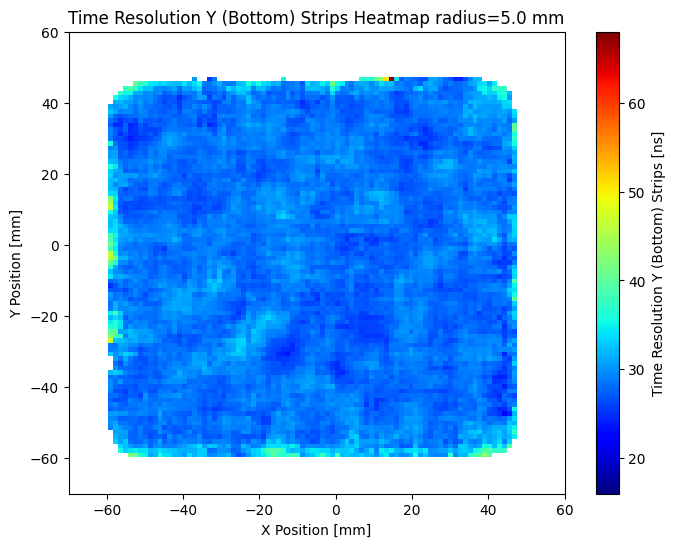

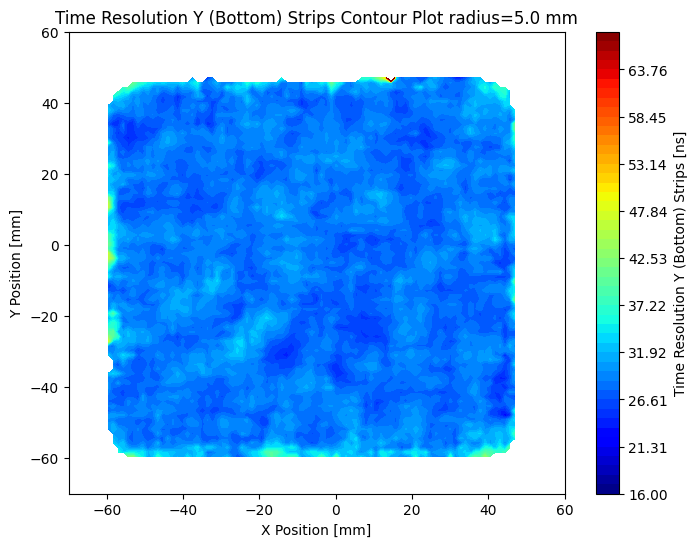

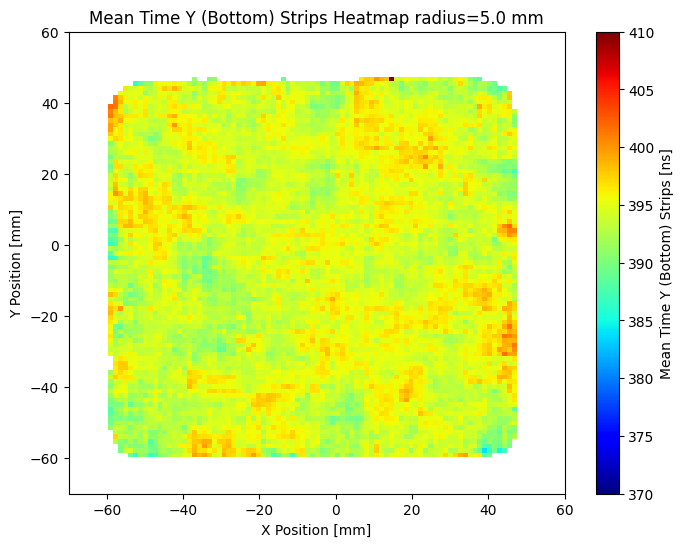

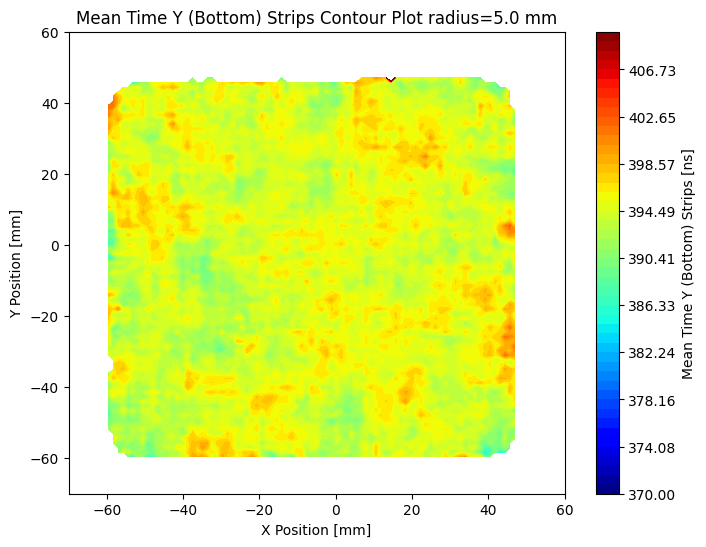

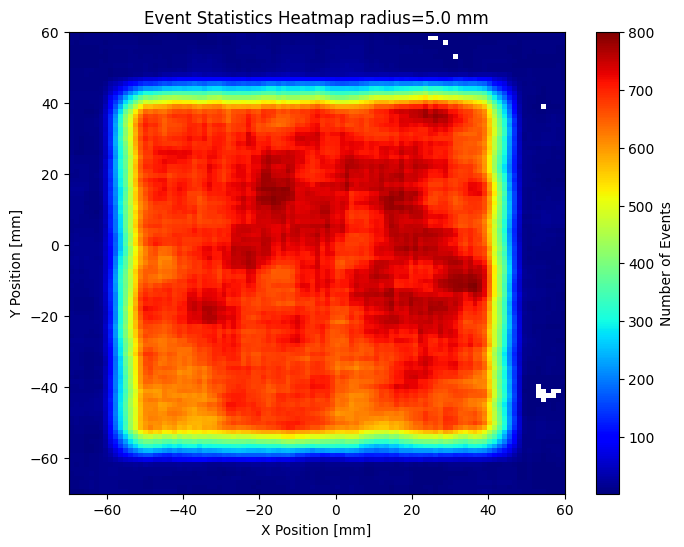

In [55]:
scan_time_resolutions_y, scan_time_means_y, events_time_y = get_circle_scan(np.array(y_time_maxes), np.array(x_rays_timing_y), np.array(y_rays_timing_y), xy_pairs, radius=scan_radius, min_events=min_events, percentile_cuts=(1, 99), shape='square', plot=False)
plot_2D_circle_scan(scan_time_resolutions_y, scan_time_means_y, scan_xs, scan_ys, scan_events=events_time_y, radius=scan_radius, percentile_filter=(1, 99), plot='both', unit_str='ns', res_title='Time Resolution Y (Bottom) Strips', mean_title='Mean Time Y (Bottom) Strips', res_range=res_range, mean_range=mean_range)

In [56]:
edge_cushion = 5 # mm
det_z = det.center[2]
for sub_det in det.sub_detectors:
    x_min_loc, x_max_loc = np.min(sub_det.x_pos), np.max(sub_det.x_pos)
    y_min_loc, y_max_loc = np.min(sub_det.y_pos), np.max(sub_det.y_pos)
    top_left, top_right = (x_min_loc, y_max_loc, det_z), (x_max_loc, y_max_loc, det_z)
    bottom_left, bottom_right = (x_min_loc, y_min_loc, det_z), (x_max_loc, y_min_loc, det_z)
    top_left, top_right = det.convert_coords_to_global(top_left), det.convert_coords_to_global(top_right)
    bottom_left, bottom_right = det.convert_coords_to_global(bottom_left), det.convert_coords_to_global(bottom_right)
    print(f'Sub-detector {sub_det.sub_index} corners:')
    print(f'Top Left: {top_left}, Top Right: {top_right}, Bottom Left: {bottom_left}, Bottom Right: {bottom_right}')


Sub-detector 0 corners:
Top Left: [  -7.87712596  -69.84927115 1403.03448276], Top Right: [  -8.14253559   -6.84983022 1403.03448276], Bottom Left: [  55.12231497  -69.58386152 1403.03448276], Bottom Right: [  54.85690534   -6.58442059 1403.03448276]
Sub-detector 1 corners:
Top Left: [ -71.87655802  -70.11889363 1403.03448276], Top Right: [ -72.14196765   -7.1194527  1403.03448276], Bottom Left: [  -8.87711709  -69.853484   1403.03448276], Bottom Right: [  -9.14252671   -6.85404307 1403.03448276]
Sub-detector 2 corners:
Top Left: [  -8.14727505   -5.7248402  1403.03448276], Top Right: [  -8.41268467   57.27460073 1403.03448276], Bottom Left: [  54.85216589   -5.45943057 1403.03448276], Bottom Right: [  54.58675626   57.54001036 1403.03448276]
Sub-detector 3 corners:
Top Left: [ -72.1467071    -5.99446268 1403.03448276], Top Right: [ -72.41211673   57.00497825 1403.03448276], Bottom Left: [  -9.14726617   -5.72905305 1403.03448276], Bottom Right: [  -9.4126758    57.27038788 1403.034482